In [48]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [36]:
data_folder_path = Path('../../data/')
print(os.listdir(data_folder_path))

['chordonomicon_raw.csv', 'final_test.csv', 'matrix_expanded_final_train.csv', 'density_expanded_final_train.csv', 'data_train_continuous_data.csv', 'spotify_final.csv', 'final_train.csv']


In [37]:
data_train = pd.read_csv(data_folder_path / 'final_train.csv')
print(data_train.columns)

Index(['chords', 'simplified_chords', 'decade', 'main_genre',
       'spotify_song_id'],
      dtype='object')


In [38]:
# Check for duplicate rows
print(f"Number of duplicate rows: {data_train.duplicated().sum()}")
print(f"Total rows: {len(data_train)}")

# View the duplicate rows if any exist
if data_train.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(data_train[data_train.duplicated(keep=False)])

Number of duplicate rows: 0
Total rows: 255606


In [39]:
# Check for duplicate spotify_song_id values
print(f"Number of duplicate spotify_song_id: {data_train['spotify_song_id'].duplicated().sum()}")
print(f"Total rows: {len(data_train)}")

# View rows with duplicate spotify_song_id if any exist
if data_train['spotify_song_id'].duplicated().sum() > 0:
    duplicates = data_train[data_train['spotify_song_id'].duplicated(keep=False)]
    print(f"\nRows with duplicate spotify_song_id: {len(duplicates)}")
    print(duplicates.sort_values('spotify_song_id'))

Number of duplicate spotify_song_id: 0
Total rows: 255606


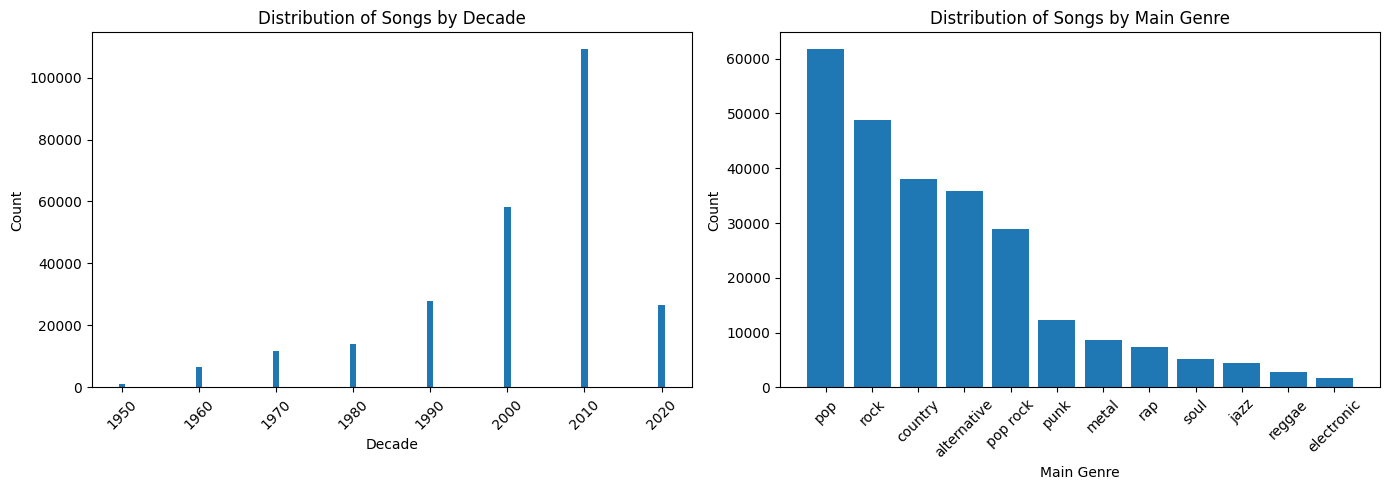

In [40]:


# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for decade
decade_counts = data_train['decade'].value_counts().sort_index()
axes[0].bar(decade_counts.index, decade_counts.values)
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Songs by Decade')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for main_genre
genre_counts = data_train['main_genre'].value_counts()
axes[1].bar(genre_counts.index, genre_counts.values)
axes[1].set_xlabel('Main Genre')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Songs by Main Genre')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [41]:
data_matrix_expanded = pd.read_csv(data_folder_path / 'matrix_expanded_final_train.csv')
data_density_expanded = pd.read_csv(data_folder_path / 'density_expanded_final_train.csv')
data_spotify = pd.read_csv(data_folder_path / 'spotify_final.csv')

In [42]:
print(data_matrix_expanded.columns)
print(len(data_matrix_expanded))

Index(['chords', 'missing_notes', 'simplified_chords', 'decade', 'drone_ratio',
       'average_overlap', 'main_genre', 'average_2overlap', 'average_3overlap',
       'average_4overlap', 'average_5overlap', 'maj_triad_ratio',
       'min_triad_ratio', 'spotify_song_id'],
      dtype='object')
255606


In [43]:
print(data_density_expanded.columns)
print(len(data_density_expanded))

Index(['chords', 'unique_5gram_density', 'unique_chord_density',
       'simplified_chords', 'decade', 'main_genre', 'spotify_song_id'],
      dtype='object')
255606


In [44]:
print(data_spotify.columns)

Index(['Unnamed: 0', 'track_id', 'artist_id', 'success', 'track_name',
       'artists', 'album_name', 'release_date', 'popularity', 'duration_ms',
       'artist_name', 'genres', 'artist_popularity', 'followers'],
      dtype='object')


In [45]:
# Merge all four datasets using dot chain
data_merged_all = (data_train
                   .merge(data_matrix_expanded, on='spotify_song_id', how='inner')
                   .merge(data_density_expanded, on='spotify_song_id', how='inner')
                   .merge(data_spotify, left_on='spotify_song_id', right_on='track_id', how='left'))

print(f"data_train rows: {len(data_train)}")
print(f"data_matrix_expanded rows: {len(data_matrix_expanded)}")
print(f"data_density_expanded rows: {len(data_density_expanded)}")
print(f"data_spotify rows: {len(data_spotify)}")
print(f"\nMerged dataset rows: {len(data_merged_all)}")
print(f"Rows with Spotify data: {data_merged_all['track_id'].notna().sum()}")
print(f"Rows without Spotify data (NaN): {data_merged_all['track_id'].isna().sum()}")
print(f"\nTotal columns: {len(data_merged_all.columns)}")

data_train rows: 255606
data_matrix_expanded rows: 255606
data_density_expanded rows: 255606
data_spotify rows: 215000

Merged dataset rows: 255606
Rows with Spotify data: 182108
Rows without Spotify data (NaN): 73498

Total columns: 38


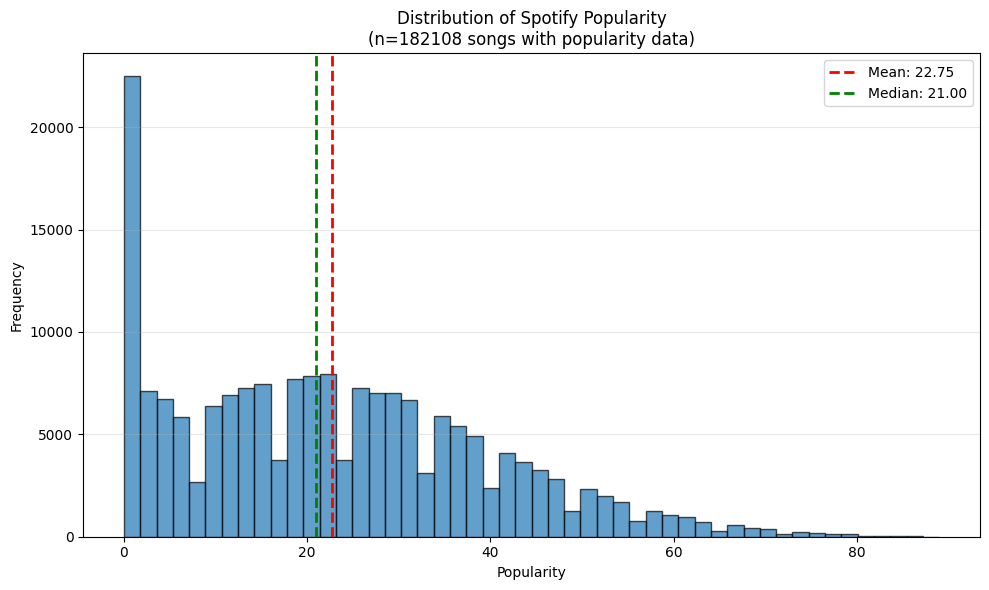

Summary Statistics:
Count: 182108
Mean: 22.75
Median: 21.00
Min: 0.00
Max: 89.00
Std: 16.97


In [46]:
# Create histogram of Spotify popularity (excluding NaN values)
popularity_data = data_merged_all['popularity'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(popularity_data, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title(f'Distribution of Spotify Popularity\n(n={len(popularity_data)} songs with popularity data)')
plt.grid(axis='y', alpha=0.3)

# Add summary statistics
mean_pop = popularity_data.mean()
median_pop = popularity_data.median()
plt.axvline(mean_pop, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_pop:.2f}')
plt.axvline(median_pop, color='green', linestyle='--', linewidth=2, label=f'Median: {median_pop:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Summary Statistics:")
print(f"Count: {len(popularity_data)}")
print(f"Mean: {mean_pop:.2f}")
print(f"Median: {median_pop:.2f}")
print(f"Min: {popularity_data.min():.2f}")
print(f"Max: {popularity_data.max():.2f}")
print(f"Std: {popularity_data.std():.2f}")

In [47]:
# Save merged data to CSV
output_path = data_folder_path / 'data_train_continuous_data.csv'
data_merged_all.to_csv(output_path, index=False)
print(f"Saved merged data to {output_path}")

Saved merged data to ../../data/data_train_continuous_data.csv
